In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tqdm
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Manual

This notebook should be inside your 'negative-selection' folder. Running the code block hereafter should show you a lot of the files necessary.

In [2]:
filenames = []
for root, dirs, files in os.walk("."):
    for filename in files:
        filenames.append(filename)

print(filenames)
print('\ngetcwd:      ', os.getcwd())

['.english.test.swp', '.tagalog.test.swp', '0.csv', '1.csv', '2.csv', '3.csv', '4.csv', '5.csv', 'english.test', 'english.train', 'hiligaynon.txt', 'middle-english.txt', 'Negative Selection Mega Old.ipynb', 'Negative_Selection Old.ipynb', 'Negative_Selection Oldy.ipynb', 'Negative_Selection.ipynb', 'negsel2.jar', 'plautdietsch.txt', 'tagalog.test', 'xhosa.txt', 'Negative Selection-checkpoint.ipynb', 'Negative_Selection-checkpoint.ipynb', 'hiligaynon.txt', 'middle-english.txt', 'plautdietsch.txt', 'xhosa.txt', 'snd-cert.1.labels', 'snd-cert.1.test', 'snd-cert.2.labels', 'snd-cert.2.test', 'snd-cert.3.labels', 'snd-cert.3.test', 'snd-cert.alpha', 'snd-cert.train', 'snd-cert_preprocessed.train', 'snd-unm.1.labels', 'snd-unm.1.test', 'snd-unm.2.labels', 'snd-unm.2.test', 'snd-unm.3.labels', 'snd-unm.3.test', 'snd-unm.alpha', 'snd-unm.train']

getcwd:       C:\Users\iskaj\OneDrive\AI Intelligent Technology\Natural Computing\Exercise 3\negative-selection


In [3]:
jar = ['java', '-jar', 'negsel2.jar']
test = ['-alphabet', 'file://english.train', '-self', 'english.train', 
        '-n', '10', '-r', '4', '-c']
args = jar + test
print("ARGUMENT: ", args)
ssh = subprocess.Popen(args,
                      stdin = subprocess.PIPE,
                      stdout = subprocess.PIPE,
                      stderr = subprocess.PIPE,
                      universal_newlines=True,
                      cwd = os.getcwd(),  
                      bufsize=0)

ARGUMENT:  ['java', '-jar', 'negsel2.jar', '-alphabet', 'file://english.train', '-self', 'english.train', '-n', '10', '-r', '4', '-c']


# New and improved calls

In [4]:
# Do a single call and return the output and error
def NS(args, inp, verbose=True):
    ssh = subprocess.Popen(args,
                          stdin = subprocess.PIPE,
                          stdout = subprocess.PIPE,
                          stderr = subprocess.PIPE,
                          universal_newlines=True,
                          cwd = os.getcwd(),  
                          bufsize=0)
    if inp is not None:
        out, _ = ssh.communicate(inp)
    else: 
        out, _ = ssh.communicate()
    if verbose:
        print("INP:", inp)
        if out != "": 
            print("OUT: ", out)
    return out.strip() #Strip to remove \n

def multi_NS(args, inp_list, verbose=False):
    process = subprocess.Popen(args, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    output, _ = process.communicate(inp_list.encode('utf-8'))
    if verbose:
        print(out, err)
    return output.decode('utf-8').strip().replace("\r\n", "").split(" ")

### Non-log Test Calls
Should return "enormous number" for fall_me_is.

In [5]:
jar = ['java', '-jar', 'negsel2.jar']
test = ['-self', 'english.train', '-n', '10', '-r', '4', '-c']
args_non_log = jar + test
print("ARGUMENTS: ", args_non_log , "\n")

inp_list = '''call_me_is 
fall_me_is
'''
outs = multi_NS(args_non_log, inp_list)

print("INPUTS:  ", inp_list)
print("OUTPUTS: ", outs)

ARGUMENTS:  ['java', '-jar', 'negsel2.jar', '-self', 'english.train', '-n', '10', '-r', '4', '-c'] 

INPUTS:   call_me_is 
fall_me_is

OUTPUTS:  ['0.0', '3.57863383E8']


### Log Test Calls
Should return "about 28" for fall_me_is.

In [13]:
jar = ['java', '-jar', 'negsel2.jar']
test = ['-self', 'english.train', '-n', '10', '-r', '4', '-c', '-l']
args_log = jar + test
print("ARGUMENTS: ", args_log , "\n")

inp_list = '''call_me_is 
fall_me_is
'''
outs = multi_NS(args_log, inp_list, False)

print("INPUTS:  ", inp_list)
print("OUTPUTS: ", outs)

ARGUMENTS:  ['java', '-jar', 'negsel2.jar', '-self', 'english.train', '-n', '10', '-r', '4', '-c', '-l'] 

INPUTS:   call_me_is 
fall_me_is

OUTPUTS:  ['0.0', '28.414833696191987']


### Number of matching patterns

In [14]:
# Create a dataframe based on args and a file containing the test strings
def create_matching_df(args, filename):
    input_string = ''''''
    input_list = []
    with open(filename) as fp:
        for line in fp:     
            input_string += line
            input_list.append(line.strip())
    output_list = multi_NS(args, input_string, False)

    df = pd.DataFrame(list(zip(input_list, output_list)), 
                   columns = ['Line', 'Output'])
    df["Output"] = df["Output"].astype(float)
    return df


In [15]:
jar = ['java', '-jar', 'negsel2.jar']
test = ['-self', 'english.train', '-n', '10', '-r', '4', '-c', '-l']
args = jar + test
print("ARGUMENTS: ", args , "\n")

r_list = np.arange(1, 10)

df_english = create_matching_df(args, 'english.test')
df_tagalog = create_matching_df(args, 'tagalog.test')
df_hiligaynon = create_matching_df(args, 'lang/hiligaynon.txt')
df_plautdietsch = create_matching_df(args, 'lang/plautdietsch.txt')
df_xhosa = create_matching_df(args, 'lang/xhosa.txt')
df_middle_english = create_matching_df(args, 'lang/middle-english.txt')

df_list = [df_english, df_tagalog, df_hiligaynon, df_plautdietsch, df_xhosa, df_middle_english]
language_files = ['english.test', 'tagalog.test', 'hiligaynon.txt', 'plautdietsch.txt', 'xhosa.txt', 'middle-english.txt']

ARGUMENTS:  ['java', '-jar', 'negsel2.jar', '-self', 'english.train', '-n', '10', '-r', '4', '-c', '-l'] 



In [16]:
jar = ['java', '-jar', 'negsel2.jar']
language_files = ['english.test', 'tagalog.test', 'lang/hiligaynon.txt', 'lang/plautdietsch.txt', 'lang/xhosa.txt', 'lang/middle-english.txt']

r_list = np.arange(1, 10)

for r in tqdm(r_list):
    test = ['-self', 'english.train', '-n', '10', '-r', str(int(r)), '-c', '-l']
    args = jar + test
    print("ARGUMENTS: ", args , "\n")
    for idx, lang in enumerate(language_files):
        df = create_matching_df(args, lang)
        print(df)
        df_list[idx][f"Output-r{r}"] = df['Output']

  0%|          | 0/9 [00:00<?, ?it/s]

ARGUMENTS:  ['java', '-jar', 'negsel2.jar', '-self', 'english.train', '-n', '10', '-r', '1', '-c', '-l'] 

           Line     Output
0    performing   0.000000
1    _the_part_   0.000000
2    i_did_besi   0.000000
3    des_cajoli  12.755096
4    ng_me_into   0.000000
..          ...        ...
119  one_grand_   0.000000
120  hooded_pha   0.000000
121  ntom_like_   0.000000
122  a_snow_hil   0.000000
123  l_in_the_a   0.000000

[124 rows x 2 columns]
           Line  Output
0    sang_una_p     0.0
1    a_nga_daan     0.0
2    _yara_na_a     0.0
3    ng_ginataw     0.0
4    ag_nga_pul     0.0
..          ...     ...
703  a_nagasaka     0.0
704  _panaog_pa     0.0
705  kadto_sa_a     0.0
706  kon_nga_an     0.0
707  ak_sang_ta     0.0

[708 rows x 2 columns]
           Line     Output
0    na_nga_taw   0.000000
1    _nagsiling   0.000000
2    a_betania_   0.000000
3    asanag_sa_   0.000000
4    awo_yara_n   0.000000
..          ...        ...
495  i_juan_sa_  12.340128
496  nod_sa_ako  

In [17]:
for df in df_list:
    print(df.drop(columns = ['Output']))

           Line  Output-r1  Output-r2  Output-r3  Output-r4  Output-r5  \
0    performing   0.000000  37.582837  35.844919  31.286885  26.314126   
1    _the_part_   0.000000  35.403010  35.023101  30.466003  25.719257   
2    i_did_besi   0.000000  37.647205  35.993536  31.282976  26.313918   
3    des_cajoli  12.755096  36.769275  35.633542  31.193803  26.313326   
4    ng_me_into   0.000000   0.000000  32.970318  29.920970  25.969654   
..          ...        ...        ...        ...        ...        ...   
119  one_grand_   0.000000  35.088118  34.855274  30.762528  26.295621   
120  hooded_pha   0.000000  36.842291  36.040127  31.283067  26.313994   
121  ntom_like_   0.000000  36.846925  35.812430  31.267782  26.313287   
122  a_snow_hil   0.000000  36.412972  35.550939  31.269246  26.313433   
123  l_in_the_a   0.000000   0.000000  32.924729  30.664051  26.028023   

     Output-r6  Output-r7  Output-r8  Output-r9  
0    21.298086  16.224039  11.059344   5.754888  
1    20.965

In [18]:
import sklearn.metrics as metrics

def get_auc(df1, df2, r):
    df1['Set'] = np.repeat(0, len(df1))
    df2['Set'] = np.repeat(1, len(df2))

    auc_df = df1.merge(df2, how = 'outer')

    fpr, tpr, thresholds = metrics.roc_curve(auc_df['Set'], auc_df[f'Output-r{r}'])
    return metrics.auc(fpr, tpr)

In [19]:
for df in df_list:
    df = df.drop(columns = ['Output'])
    display(df)

,Line,Output-r1,Output-r2,Output-r3,Output-r4,Output-r5,Output-r6,Output-r7,Output-r8,Output-r9
0,performing,0.000000,37.582837,35.844919,31.286885,26.314126,21.298086,16.224039,11.059344,5.754888
1,_the_part_,0.000000,35.403010,35.023101,30.466003,25.719257,20.965102,16.224039,11.059344,5.754888
2,i_did_besi,0.000000,37.647205,35.993536,31.282976,26.313918,21.298079,16.224039,11.059344,5.754888
3,des_cajoli,12.755096,36.769275,35.633542,31.193803,26.313326,21.298056,16.224039,11.059344,5.754888
4,ng_me_into,0.000000,0.000000,32.970318,29.920970,25.969654,21.295568,16.224039,11.059344,5.754888
...,...,...,...,...,...,...,...,...,...,...
119,one_grand_,0.000000,35.088118,34.855274,30.762528,26.295621,21.297270,16.224039,11.059344,5.754888
120,hooded_pha,0.000000,36.842291,36.040127,31.283067,26.313994,21.298085,16.224039,11.059344,5.754888
121,ntom_like_,0.000000,36.846925,35.812430,31.267782,26.313287,21.298055,16.224039,11.059344,5.754888
122,a_snow_hil,0.000000,36.412972,35.550939,31.269246,26.313433,21.298056,16.224039,11.059344,5.754888


,Line,Output-r1,Output-r2,Output-r3,Output-r4,Output-r5,Output-r6,Output-r7,Output-r8,Output-r9
0,sang_una_p,0.0,36.754253,35.603338,31.238023,26.311345,21.298056,16.224039,11.059344,5.754888
1,a_nga_daan,0.0,34.723399,35.634261,31.052608,26.295532,21.297269,16.224039,11.059344,5.754888
2,_yara_na_a,0.0,36.956226,36.010124,31.283373,26.314037,21.298084,16.224039,11.059344,5.754888
3,ng_ginataw,0.0,36.217161,35.486809,31.262765,26.313217,21.298044,16.224039,11.059344,5.754888
4,ag_nga_pul,0.0,37.181257,35.982083,31.281516,26.313982,21.298086,16.224039,11.059344,5.754888
...,...,...,...,...,...,...,...,...,...,...
703,a_nagasaka,0.0,37.732532,36.063108,31.285323,26.314079,21.298086,16.224039,11.059344,5.754888
704,_panaog_pa,0.0,36.767753,35.714699,31.282364,26.314089,21.298086,16.224039,11.059344,5.754888
705,kadto_sa_a,0.0,36.976523,35.620482,31.252127,26.312608,21.298055,16.224039,11.059344,5.754888
706,kon_nga_an,0.0,36.718048,35.595186,31.252603,26.314118,21.298085,16.224039,11.059344,5.754888


,Line,Output-r1,Output-r2,Output-r3,Output-r4,Output-r5,Output-r6,Output-r7,Output-r8,Output-r9
0,na_nga_taw,0.000000,37.115698,35.954243,31.279292,26.313982,21.298086,16.224039,11.059344,5.754888
1,_nagsiling,0.000000,36.710321,35.858167,31.285503,26.314070,21.298085,16.224039,11.059344,5.754888
2,a_betania_,0.000000,35.128917,35.599132,31.242883,26.312548,21.298026,16.224039,11.059344,5.754888
3,asanag_sa_,0.000000,36.577062,35.976375,31.279313,26.314086,21.298086,16.224039,11.059344,5.754888
4,awo_yara_n,0.000000,37.627122,36.029117,31.284388,26.314128,21.298086,16.224039,11.059344,5.754888
...,...,...,...,...,...,...,...,...,...,...
495,i_juan_sa_,12.340128,37.425365,35.976438,31.277805,26.313844,21.298080,16.224039,11.059344,5.754888
496,nod_sa_ako,0.000000,36.528760,35.443966,31.030769,26.294648,21.297240,16.224039,11.059344,5.754888
497,ero_indi_g,0.000000,36.226426,35.722837,31.230826,26.310991,21.297956,16.224039,11.059344,5.754888
498,a_ang_iya_,0.000000,36.274901,35.535424,31.248957,26.313155,21.298056,16.224039,11.059344,5.754888


,Line,Output-r1,Output-r2,Output-r3,Output-r4,Output-r5,Output-r6,Output-r7,Output-r8,Output-r9
0,_waut_jesu,12.755096,37.585436,36.004220,31.284750,26.313989,21.298082,16.224039,11.059344,5.754888
1,da_obraum_,0.000000,37.326772,36.069072,31.285577,26.314112,21.298085,16.224039,11.059344,5.754888
2,ata_aus_de,0.000000,36.936393,35.942308,31.279473,26.313961,21.298086,16.224039,11.059344,5.754888
3,ekjt_haft_,12.340128,37.686876,35.808970,31.264238,26.313114,21.298051,16.224039,11.059344,5.754888
4,jemoakt_es,13.339989,37.183403,36.001668,31.281956,26.314113,21.298085,16.224039,11.059344,5.754888
...,...,...,...,...,...,...,...,...,...,...
495,ua_sent_de,0.000000,36.271241,34.952053,30.761933,26.040946,21.275888,16.223021,11.059344,5.754888
496,_soldota_d,0.000000,35.743935,36.019812,31.283818,26.314065,21.298084,16.224039,11.059344,5.754888
497,_jie_dan_d,12.755096,37.080824,35.691316,31.245425,26.313740,21.298084,16.224039,11.059344,5.754888
498,nich_nom_f,0.000000,34.432908,35.825929,31.266519,26.313266,21.298054,16.224039,11.059344,5.754888


,Line,Output-r1,Output-r2,Output-r3,Output-r4,Output-r5,Output-r6,Output-r7,Output-r8,Output-r9
0,a_zeedenar,12.340128,36.958325,36.069989,31.284394,26.314066,21.298085,16.224039,11.059344,5.754888
1,e_bona_uye,0.000000,36.876602,35.861403,31.266736,26.313271,21.298056,16.224039,11.059344,5.754888
2,nga_kuwe_w,0.000000,37.583187,35.999407,31.286452,26.314122,21.298086,16.224039,11.059344,5.754888
3,diyamthand,0.000000,37.694481,35.674464,31.269137,26.313227,21.298086,16.224039,11.059344,5.754888
4,oko_waphum,0.000000,38.160952,35.679173,31.221978,26.311382,21.297995,16.224039,11.059344,5.754888
...,...,...,...,...,...,...,...,...,...,...
495,zwi_la_ndi,13.339989,36.465965,35.773449,31.256892,26.312882,21.298025,16.224039,11.059344,5.754888
496,se_lowo_un,0.000000,36.545875,35.733353,31.268353,26.314089,21.298085,16.224039,11.059344,5.754888
497,nqula_khon,0.000000,37.284689,36.026603,31.284446,26.313989,21.298084,16.224039,11.059344,5.754888
498,namanci_ma,0.000000,37.056985,35.994597,31.282379,26.314030,21.298085,16.224039,11.059344,5.754888


,Line,Output-r1,Output-r2,Output-r3,Output-r4,Output-r5,Output-r6,Output-r7,Output-r8,Output-r9
0,en_schit_a,0.000000,36.753880,35.492196,31.265930,26.314112,21.298086,16.224039,11.059344,5.754888
1,_of_lijf_t,12.755096,36.634212,35.604517,31.267235,26.313336,21.298055,16.224039,11.059344,5.754888
2,oure_herte,0.000000,0.000000,34.798420,31.005253,26.293459,21.297266,16.224039,11.059344,5.754888
3,eiden_what,0.000000,36.600930,35.368938,31.252356,26.313296,21.298052,16.224039,11.059344,5.754888
4,ied_ne_dre,0.000000,36.047566,35.352022,31.229478,26.312508,21.298055,16.224039,11.059344,5.754888
...,...,...,...,...,...,...,...,...,...,...
495,nessyng_to,0.000000,37.121955,35.601776,31.231225,26.309356,21.298086,16.224039,11.059344,5.754888
496,_was_maad_,0.000000,36.728569,35.846547,31.267160,26.313244,21.298084,16.224039,11.059344,5.754888
497,hat_his_ma,0.000000,36.521036,35.877936,31.277275,26.314028,21.298086,16.224039,11.059344,5.754888
498,teyne_tyme,0.000000,37.360768,35.790087,31.261236,26.312967,21.298042,16.224039,11.059344,5.754888


In [20]:
for idx, df in enumerate(df_list):
    df.to_csv(f"{idx}.csv")

As we can see here, the average number of matching patterns is somewhat less than 2-fold higher for Tagalog strings than for English strings, so some learning does seem to occur.

# 1.3 Which language can be best discriminated?

Avg numb matched patterns for  english.test :  30.620943399026366
Avg numb matched patterns for  tagalog.test :  31.238324663081155
Avg numb matched patterns for  lang/hiligaynon.txt :  31.242605860114484
Avg numb matched patterns for  lang/plautdietsch.txt :  31.21486159595102
Avg numb matched patterns for  lang/xhosa.txt :  31.25137583204997
Avg numb matched patterns for  lang/middle-english.txt :  30.901190560169315


[Text(0, 0, 'english.test'),
 Text(0, 0, 'tagalog.test'),
 Text(0, 0, 'lang/hiligaynon.txt'),
 Text(0, 0, 'lang/plautdietsch.txt'),
 Text(0, 0, 'lang/xhosa.txt'),
 Text(0, 0, 'lang/middle-english.txt')]

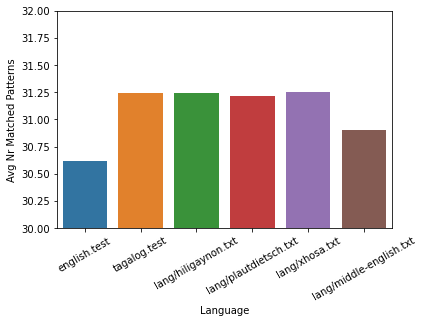

In [21]:
mean_list = []
for i, df in enumerate(df_list):
    print("Avg numb matched patterns for ", language_files[i], ": ", np.mean(df["Output"]))
    mean_list.append(np.mean(df["Output"]))
    
data = pd.DataFrame(list(zip(language_files, mean_list)), 
                   columns =['Language', 'Avg Nr Matched Patterns'])

ax = sns.barplot(x="Language", y="Avg Nr Matched Patterns", data=data)
ax.set(ylim=(30, 32))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# 1.1 & 1.2

r: 1
File:              tagalog.test, AUC:   0.543535
File:       lang/hiligaynon.txt, AUC:   0.545960
File:     lang/plautdietsch.txt, AUC:   0.655323
File:            lang/xhosa.txt, AUC:   0.619153
File:   lang/middle-english.txt, AUC:   0.515661


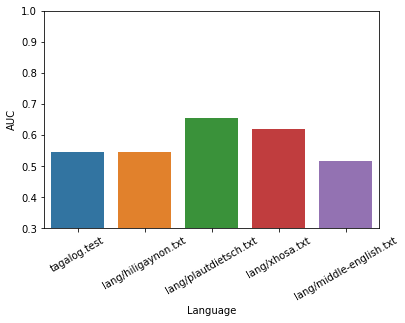

r: 2
File:              tagalog.test, AUC:   0.739646
File:       lang/hiligaynon.txt, AUC:   0.751903
File:     lang/plautdietsch.txt, AUC:   0.707040
File:            lang/xhosa.txt, AUC:   0.851694
File:   lang/middle-english.txt, AUC:   0.514210


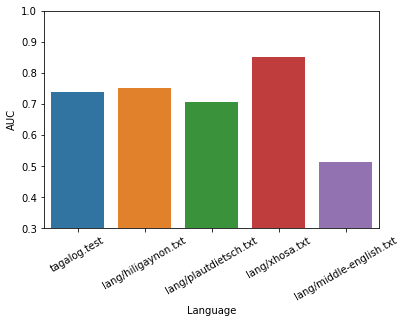

r: 3
File:              tagalog.test, AUC:   0.831124
File:       lang/hiligaynon.txt, AUC:   0.839742
File:     lang/plautdietsch.txt, AUC:   0.774677
File:            lang/xhosa.txt, AUC:   0.889339
File:   lang/middle-english.txt, AUC:   0.542444


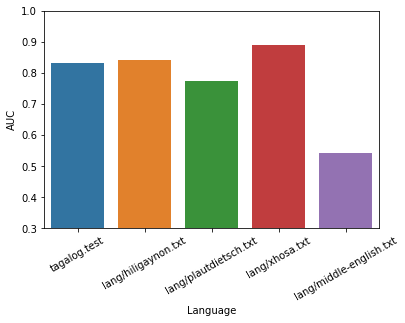

r: 4
File:              tagalog.test, AUC:   0.791610
File:       lang/hiligaynon.txt, AUC:   0.797468
File:     lang/plautdietsch.txt, AUC:   0.753403
File:            lang/xhosa.txt, AUC:   0.832274
File:   lang/middle-english.txt, AUC:   0.533887


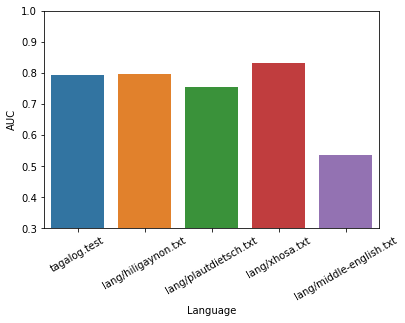

r: 5
File:              tagalog.test, AUC:   0.728244
File:       lang/hiligaynon.txt, AUC:   0.730242
File:     lang/plautdietsch.txt, AUC:   0.701435
File:            lang/xhosa.txt, AUC:   0.764645
File:   lang/middle-english.txt, AUC:   0.522411


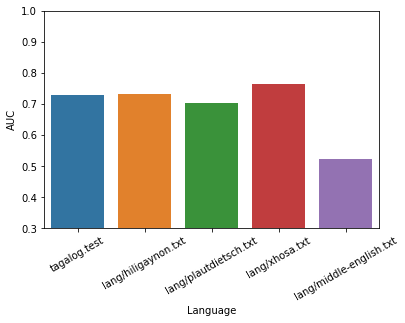

r: 6
File:              tagalog.test, AUC:   0.668085
File:       lang/hiligaynon.txt, AUC:   0.670871
File:     lang/plautdietsch.txt, AUC:   0.650073
File:            lang/xhosa.txt, AUC:   0.691581
File:   lang/middle-english.txt, AUC:   0.502097


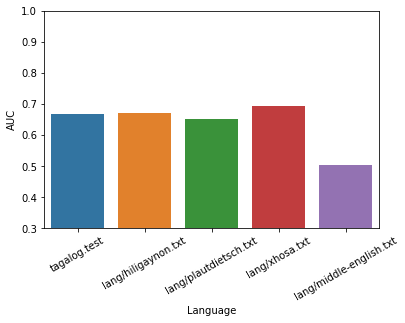

r: 7
File:              tagalog.test, AUC:   0.590726
File:       lang/hiligaynon.txt, AUC:   0.593331
File:     lang/plautdietsch.txt, AUC:   0.585581
File:            lang/xhosa.txt, AUC:   0.588766
File:   lang/middle-english.txt, AUC:   0.512395


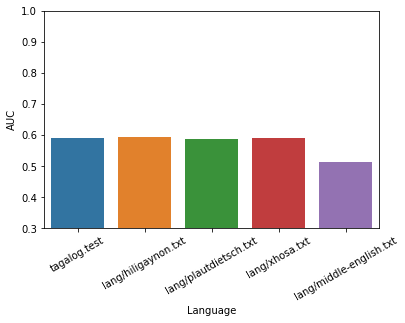

r: 8
File:              tagalog.test, AUC:   0.520161
File:       lang/hiligaynon.txt, AUC:   0.520161
File:     lang/plautdietsch.txt, AUC:   0.519194
File:            lang/xhosa.txt, AUC:   0.520161
File:   lang/middle-english.txt, AUC:   0.508427


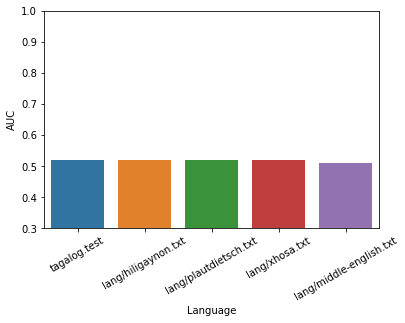

r: 9
File:              tagalog.test, AUC:   0.512097
File:       lang/hiligaynon.txt, AUC:   0.512097
File:     lang/plautdietsch.txt, AUC:   0.512097
File:            lang/xhosa.txt, AUC:   0.512097
File:   lang/middle-english.txt, AUC:   0.512097


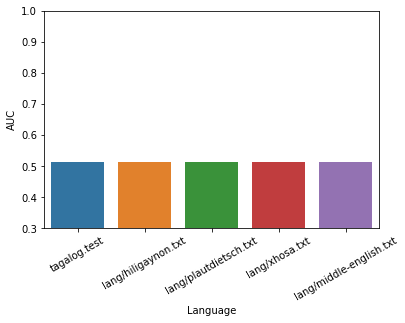

In [29]:
all_aucs = []
auc_df = pd.DataFrame(index=language_files[1:])
for r in r_list:
    print(f'r: {r}')
    aucs = []
    for idx in range(len(df_list[1:])):
        aucs.append(get_auc(df_list[0], df_list[idx+1], r))
        print('File: %25s, AUC: %10f' % (language_files[idx+1], get_auc(df_list[0], df_list[idx+1], r)))
    
    data = pd.DataFrame(list(zip(language_files[1:], aucs)), 
                       columns =['Language', 'AUC'])
    ax = sns.barplot(x="Language", y="AUC", data=data)
    ax.set(ylim=(0.3, 1.0))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.show()
    auc_df["AUC_r" + str(r)] = aucs
    all_aucs.append(aucs)

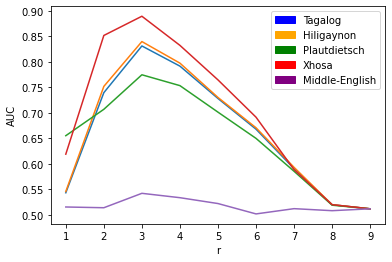

In [28]:
import matplotlib.patches as mpatches
x=[1,2,3,4,5,6,7,8,9]
plt.plot(x, all_aucs)
plt.ylabel("AUC")
plt.xlabel("r")

tagalog_patch = mpatches.Patch(color='blue', label='Tagalog')
hiligaynon_patch = mpatches.Patch(color='orange', label='Hiligaynon')
plautdietsch_patch = mpatches.Patch(color='green', label='Plautdietsch')
xhosa_patch = mpatches.Patch(color='red', label='Xhosa')
Middle_English_patch = mpatches.Patch(color='purple', label='Middle-English')

plt.legend(handles=[tagalog_patch, hiligaynon_patch, plautdietsch_patch, xhosa_patch, Middle_English_patch])
plt.show()


# 2

#### CERT

In [37]:
from itertools import combinations
import sklearn.metrics as metrics

# Split text into substrings of length 'length'
def preprocess(text, length=5):
    return [text[x:y].strip() for x, y in combinations(range(len(text) + 1), r = 2) if len(text[x:y].strip()) == length]

def create_matching_df_syscalls(args, filename, chunk_length):
    input_string = ''''''
    input_list = []
    sequence_nr_list = []
    
    with open(filename) as fp:
            sequence_nr = 0
            for line in fp:
                for chunk in preprocess(line, length=chunk_length):
                    out = 0
                    input_string += chunk
                    input_list.append(chunk.strip())
                    sequence_nr_list.append(sequence_nr)
                sequence_nr += 1
    output_list = multi_NS(args, input_string, False)
    df = pd.DataFrame(list(zip(input_list, sequence_nr_list, output_list)), 
                   columns =['Chunk', 'Sequence', 'Output'])
    df["Output"] = df["Output"].astype(float)
    return df

In [38]:
CHUNK_LENGTH = 5

In [39]:
jar = ['java', '-jar', 'negsel2.jar']
test = ['-alphabet', 'file://syscalls/snd-cert/snd-cert.alpha', '-self', 'syscalls/snd-cert/snd-cert_preprocessed.train', '-n', str(CHUNK_LENGTH), '-r', '3', '-c', '-l']

args = jar + test
print("ARGUMENTS: ", args , "\n")

df_cert_1 = create_matching_df_syscalls(args, 'syscalls/snd-cert/snd-cert.1.test', CHUNK_LENGTH)
df_cert_2 = create_matching_df_syscalls(args, 'syscalls/snd-cert/snd-cert.2.test', CHUNK_LENGTH)
df_cert_3 = create_matching_df_syscalls(args, 'syscalls/snd-cert/snd-cert.3.test', CHUNK_LENGTH)

ARGUMENTS:  ['java', '-jar', 'negsel2.jar', '-alphabet', 'file://syscalls/snd-cert/snd-cert.alpha', '-self', 'syscalls/snd-cert/snd-cert_preprocessed.train', '-n', '5', '-r', '3', '-c', '-l'] 



In [54]:
def group_anomalies(df, test_set, data_name):
    df_grouped = df.groupby("Sequence").agg({"Output":'mean'})
    
    sequence_label_list = []
    with open('syscalls/' + test_set + '/' + data_name + ".labels") as labels:
        sequence_label_list.extend(labels.readlines())
        sequence_label_list = [x.strip() for x in sequence_label_list]

    df_grouped['Label'] = sequence_label_list
    df_grouped['Label'] = df_grouped['Label'].astype(int)
    return df_grouped


In [55]:
cert1_grouped = group_anomalies(df_cert_1, 'snd-cert', 'snd-cert.1')
cert2_grouped = group_anomalies(df_cert_2, 'snd-cert', 'snd-cert.2')
cert3_grouped = group_anomalies(df_cert_3, 'snd-cert', 'snd-cert.3')

In [56]:
def get_auc_syscalls(df):
    fpr, tpr, thresholds = metrics.roc_curve(df['Label'], df[f'Output'])
    return metrics.auc(fpr, tpr)

In [57]:
# AUC stuff
auc_1 = get_auc_syscalls(cert1_grouped)
auc_2 = get_auc_syscalls(cert2_grouped)
auc_3 = get_auc_syscalls(cert3_grouped)

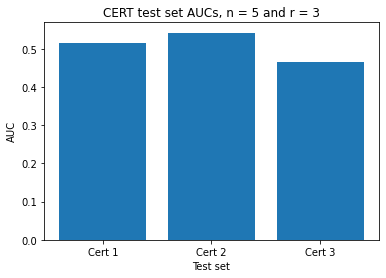

In [58]:
test_sets = ["Cert 1", "Cert 2", "Cert 3"]
plt.bar(test_sets, [auc_1, auc_2, auc_3])
plt.title("CERT test set AUCs, n = 5 and r = 3")
plt.xlabel("Test set")
plt.ylabel("AUC")
plt.show()

#### UNM

In [45]:
jar = ['java', '-jar', 'negsel2.jar']
test = ['-self', 'syscalls/snd-unm/snd-unm_preprocessed.train', '-n', str(CHUNK_LENGTH), '-r', '3', '-c', '-l' , '-alphabet', 'file://syscalls/snd-unm/snd-unm.alpha']

args = jar + test
print("ARGUMENTS: ", args , "\n")

df_unm_1 = create_matching_df_syscalls(args, 'syscalls/snd-unm/snd-unm.1.test', CHUNK_LENGTH)
df_unm_2 = create_matching_df_syscalls(args, 'syscalls/snd-unm/snd-unm.2.test', CHUNK_LENGTH)
df_unm_3 = create_matching_df_syscalls(args, 'syscalls/snd-unm/snd-unm.3.test', CHUNK_LENGTH)

ARGUMENTS:  ['java', '-jar', 'negsel2.jar', '-self', 'syscalls/snd-unm/snd-unm_preprocessed.train', '-n', '5', '-r', '3', '-c', '-l', '-alphabet', 'file://syscalls/snd-unm/snd-unm.alpha'] 



In [60]:
unm1_grouped = group_anomalies(df_unm_1, 'snd-unm', 'snd-unm.1')
unm2_grouped = group_anomalies(df_unm_2, 'snd-unm', 'snd-unm.2')
unm3_grouped = group_anomalies(df_unm_3, 'snd-unm', 'snd-unm.3')

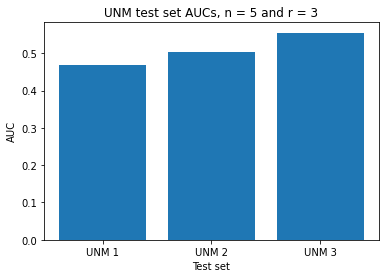

In [61]:
# AUC stuff
auc_1 = get_auc_syscalls(unm1_grouped)
auc_2 = get_auc_syscalls(unm2_grouped)
auc_3 = get_auc_syscalls(unm3_grouped)

test_sets = ["UNM 1", "UNM 2", "UNM 3"]
plt.bar(test_sets, [auc_1, auc_2, auc_3])
plt.title("UNM test set AUCs, n = 5 and r = 3")
plt.xlabel("Test set")
plt.ylabel("AUC")
plt.show()